<a href="https://colab.research.google.com/github/DIFACQUIM/antiviral_ML/blob/main/Prepare_inputs_fps_Distance_to_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distance to model
---
Contact: fer.saldivarg@gmail.com




In [ ]:
# Installation and import of libraries

!pip install rdkit
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem, PandasTools
from scipy.spatial.distance import pdist, cdist, squareform
from tqdm import tqdm
PandasTools.RenderImagesInAllDataFrames(images=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 27.5 MB/s eta 0:00:00


In [ ]:
# Specify the PATH to the input datasets (training set)
data = pd.read_csv("/content/IBV_Neuraminidase_molecules.csv")
data.head()

,molecule_chembl_id,canonical_smiles_std,unique_target,activity,mw,fsp3,n_lipinski_hba,n_lipinski_hbd,n_rings,n_rotatable_bonds,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,CHEMBL222813,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,IBV_Neuraminidase,1.0,332.133199,0.583333,11,9,1,6,...,0,0,0,1,0,1,0,0,0,0
1,CHEMBL73669,CCCN(CCc1ccccc1)C(=O)[C@@H]1OC(C(=O)O)=C[C@H](...,IBV_Neuraminidase,1.0,389.195071,0.450000,8,4,2,8,...,0,0,0,1,0,1,0,0,0,0
2,CHEMBL300461,CCCN(C)C(=O)[C@@H]1OC(C(=O)O)=C[C@H](NC(=N)N)[...,IBV_Neuraminidase,1.0,341.169919,0.571429,10,6,1,6,...,0,0,0,1,0,1,0,0,0,0
3,CHEMBL295490,CCCN(CCC)C(=O)[C@@H]1OC(C(=O)O)=C[C@H](N)[C@H]...,IBV_Neuraminidase,1.0,327.179421,0.666667,8,4,1,7,...,0,0,0,1,0,1,0,0,0,0
4,CHEMBL317645,CCN(CC)C(=O)[C@@H]1OC(C(=O)O)=C[C@H](N)[C@H]1N...,IBV_Neuraminidase,1.0,299.148121,0.615385,8,4,1,5,...,0,0,0,1,0,1,0,0,0,0


In [ ]:
# Function to check if a given SMILES string is valid using RDKit
def is_valid_smiles(smiles):
    try:
        Chem.MolFromSmiles(smiles)
        return True
    except:
        return False

data = data[data["canonical_smiles_std"].apply(is_valid_smiles)]

,molecule_chembl_id,canonical_smiles_std,unique_target,activity,mw,fsp3,n_lipinski_hba,n_lipinski_hbd,n_rings,n_rotatable_bonds,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,molecule
0,CHEMBL222813,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,IBV_Neuraminidase,1.0,332.133199,0.583333,11,9,1,6,...,0,0,1,0,1,0,0,0,0,
1,CHEMBL73669,CCCN(CCc1ccccc1)C(=O)[C@@H]1OC(C(=O)O)=C[C@H](...,IBV_Neuraminidase,1.0,389.195071,0.450000,8,4,2,8,...,0,0,1,0,1,0,0,0,0,
2,CHEMBL300461,CCCN(C)C(=O)[C@@H]1OC(C(=O)O)=C[C@H](NC(=N)N)[...,IBV_Neuraminidase,1.0,341.169919,0.571429,10,6,1,6,...,0,0,1,0,1,0,0,0,0,
3,CHEMBL295490,CCCN(CCC)C(=O)[C@@H]1OC(C(=O)O)=C[C@H](N)[C@H]...,IBV_Neuraminidase,1.0,327.179421,0.666667,8,4,1,7,...,0,0,1,0,1,0,0,0,0,
4,CHEMBL317645,CCN(CC)C(=O)[C@@H]1OC(C(=O)O)=C[C@H](N)[C@H]1N...,IBV_Neuraminidase,1.0,299.148121,0.615385,8,4,1,5,...,0,0,1,0,1,0,0,0,0,

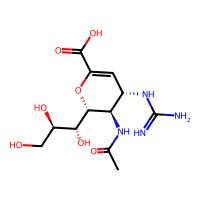
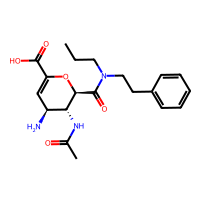
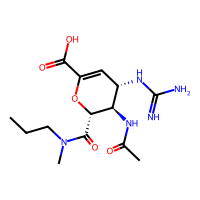
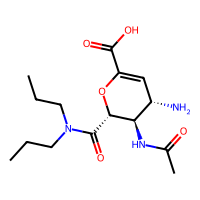
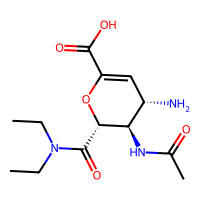

In [ ]:
PandasTools.AddMoleculeColumnToFrame(data, smilesCol="canonical_smiles_std",molCol='molecule') # add ignoreInvalidSmiles=True to handle missing or incorrect SMILES strings
data.head()


In [ ]:
# Compute descriptors
morgan_fp = pd.DataFrame([fp for fp in data["molecule"].dropna().apply(lambda x: [int(y) for y in AllChem.GetMorganFingerprintAsBitVect(x, radius=2, nBits=2048).ToBitString()])])


[17:27:29] DEPRECATION WARNING: please use MorganGenerator
[17:27:29] DEPRECATION WARNING: please use MorganGenerator
[17:27:29] DEPRECATION WARNING: please use MorganGenerator
[17:27:29] DEPRECATION WARNING: please use MorganGenerator
[17:27:29] DEPRECATION WARNING: please use MorganGenerator
[17:27:29] DEPRECATION WARNING: please use MorganGenerator
[17:27:29] DEPRECATION WARNING: please use MorganGenerator
[17:27:29] DEPRECATION WARNING: please use MorganGenerator
[17:27:29] DEPRECATION WARNING: please use MorganGenerator
[17:27:29] DEPRECATION WARNING: please use MorganGenerator
[17:27:29] DEPRECATION WARNING: please use MorganGenerator
[17:27:29] DEPRECATION WARNING: please use MorganGenerator
[17:27:29] DEPRECATION WARNING: please use MorganGenerator
[17:27:29] DEPRECATION WARNING: please use MorganGenerator
[17:27:29] DEPRECATION WARNING: please use MorganGenerator
[17:27:29] DEPRECATION WARNING: please use MorganGenerator
[17:27:29] DEPRECATION WARNING: please use MorganGenerat

In [ ]:
#Save in csv format
morgan_fp.to_csv("/content/IBV_Neuraminidase_molecules_fps.csv")


In [ ]:
# Compute the pairwise Jaccard distances between all Morgan fingerprints in the dataset

distance_all = pd.DataFrame(squareform(pdist(morgan_fp, metric="jaccard"))).sum(axis=1) / morgan_fp.shape[0]

In [ ]:
# Custom function to asign a quartile according to the mean jaccard distance
def get_quartile(dtm):
    if dtm <= data["pairsim"].describe(percentiles=[0.25,0.75])["25%"]:
        return "Q1"
    elif dtm <= data["pairsim"].describe(percentiles=[0.25,0.75])["50%"] and dtm > data["pairsim"].describe(percentiles=[0.25,0.75])["25%"]:
        return "Q2"
    elif dtm <= data["pairsim"].describe(percentiles=[0.25,0.75])["75%"] and dtm > data["pairsim"].describe(percentiles=[0.25,0.75])["50%"]:
        return "Q3"
    elif dtm <= data["pairsim"].describe(percentiles=[0.25,0.75])["max"] and dtm > data["pairsim"].describe(percentiles=[0.25,0.75])["75%"]:
        return "Q4"
    else:
        return "Out"

In [ ]:
distance_all

,0
0,0.733981
1,0.640269
2,0.707867
3,0.632765
4,0.650853
...,...
197,0.694812
198,0.632765
199,0.661216
200,0.705812


In [ ]:
distance_all = distance_all.reindex(data.index)
data["pairsim"] = list(distance_all)
data["pairsim"].describe(percentiles=[0.25,0.75])

,pairsim
count,202.000000
mean,0.729738
std,0.047040
min,0.632765
25%,0.698230
50%,0.724926
75%,0.759836
max,0.866642


In [ ]:
data["Quartile"] = data["pairsim"].apply(get_quartile)

,molecule_chembl_id,canonical_smiles_std,unique_target,activity,mw,fsp3,n_lipinski_hba,n_lipinski_hbd,n_rings,n_rotatable_bonds,...,1017,1018,1019,1020,1021,1022,1023,molecule,pairsim,Quartile
0,CHEMBL222813,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,IBV_Neuraminidase,1.0,332.133199,0.583333,11,9,1,6,...,1,0,1,0,0,0,0,,0.733981,Q3
1,CHEMBL73669,CCCN(CCc1ccccc1)C(=O)[C@@H]1OC(C(=O)O)=C[C@H](...,IBV_Neuraminidase,1.0,389.195071,0.450000,8,4,2,8,...,1,0,1,0,0,0,0,,0.640269,Q1
2,CHEMBL300461,CCCN(C)C(=O)[C@@H]1OC(C(=O)O)=C[C@H](NC(=N)N)[...,IBV_Neuraminidase,1.0,341.169919,0.571429,10,6,1,6,...,1,0,1,0,0,0,0,,0.707867,Q2
3,CHEMBL295490,CCCN(CCC)C(=O)[C@@H]1OC(C(=O)O)=C[C@H](N)[C@H]...,IBV_Neuraminidase,1.0,327.179421,0.666667,8,4,1,7,...,1,0,1,0,0,0,0,,0.632765,Q1
4,CHEMBL317645,CCN(CC)C(=O)[C@@H]1OC(C(=O)O)=C[C@H](N)[C@H]1N...,IBV_Neuraminidase,1.0,299.148121,0.615385,8,4,1,5,...,1,0,1,0,0,0,0,,0.650853,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,CHEMBL422016,CCCN(CCC)C(=O)[C@@H]1OC(C(=O)O)=C[C@H](NCC)[C@...,IBV_Neuraminidase,1.0,355.210721,0.705882,8,3,1,9,...,1,0,1,0,0,0,0,,0.694812,Q1
198,CHEMBL422026,CCCN(CCC)C(=O)[C@@H]1OC(C(=O)O)=C[C@@H](N)[C@H...,IBV_Neuraminidase,1.0,327.179421,0.666667,8,4,1,7,...,1,0,1,0,0,0,0,,0.632765,Q1
199,CHEMBL424528,CCCN(CCc1ccc(C(C)C)cc1)C(=O)[C@@H]1OC(C(=O)O)=...,IBV_Neuraminidase,1.0,431.242021,0.521739,8,4,2,9,...,1,0,1,0,0,0,0,,0.661216,Q1
200,CHEMBL436250,CC(=O)N[C@H]1[C@@H](C(=O)N2C(C)CCC2C)OC(C(=O)O...,IBV_Neuraminidase,1.0,325.163771,0.666667,8,4,2,3,...,1,0,1,0,0,0,0,,0.705812,Q2

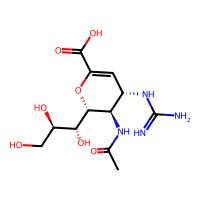
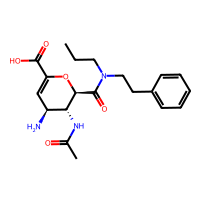
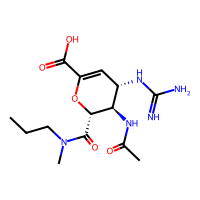
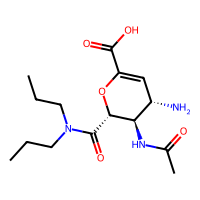
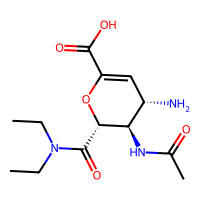
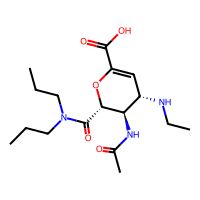
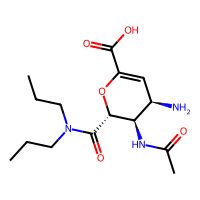
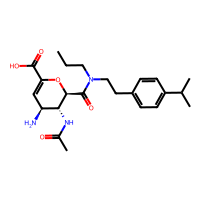
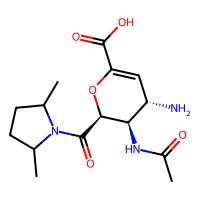
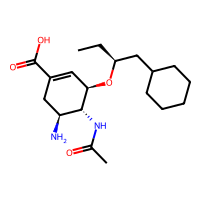

In [ ]:
data

In [ ]:
data.drop("molecule", axis=1, inplace=True)
data.to_csv("/content/IBV_Neuraminidase_molecules_quartiles.csv")

In [ ]:
# Distance-to-model results for the data

data_results = []
for name, group in data.groupby("Quartile"):
    pairsim_min = f"{group['pairsim'].min():.4f}"  # Minimum pairsim value
    pairsim_max = f"{group['pairsim'].max():.4f}"  # Maximum pairsim value
    # Append the quartile, size of the group, and the (min, max) range of pairsim to the results list


    data_results.append([group["Quartile"].unique()[0], group.shape[0], (pairsim_min, pairsim_max)])

# Convert the list of results into a DataFrame

data_results = pd.DataFrame(data_results, columns=[ "Quartile", "Size", "Range"])
data_results["Target"] = data["unique_target"].unique()[0]
data_results

,Quartile,Size,Range,Target
0,Q1,52,"(0.6328, 0.6982)",IBV_Neuraminidase
1,Q2,49,"(0.6984, 0.7249)",IBV_Neuraminidase
2,Q3,50,"(0.7250, 0.7594)",IBV_Neuraminidase
3,Q4,51,"(0.7600, 0.8666)",IBV_Neuraminidase


In [ ]:
data_results.to_csv("/content/IBV_Neuraminidase_molecules_stat.csv")



---

